# COMP 364: A brief tour of the Standard Library

There are three kinds of modules/packages:

* Modules you make yourself
* Third-party modules (e.g. [matplotlib](https://matplotlib.org/))
* Standard library modules

Standard library modules come included in Python and they contain many useful tools.

They are maintained by the core Python development team so you can count on them being reliable.

The Python Standard Library is very extensive, so I will just show you some highlights.

Refer to [this](https://docs.python.org/3/tutorial/stdlib.html) and [this](https://docs.python.org/3/library/index.html) for a more complete view on the Standard Library.

**Note:** Standard Library packages and modules are NOT the same thing as **built-in** objects (e.g. `print`, `open`, `zip`, `enumerate`). You still have to `import` standard library modules/packages you just don't have to install them from elsewhere.



## System-related 

* `sys`: functions and variables working on the Python interpreter
* `os`: operating system functionality
* `shutil`: file manipulation

### `sys`

In [3]:
import sys

#get the interpreter path
print(f"Interpreter is located at: {sys.executable}\n")
#get module search path
print(f"Look for modules in: {sys.path}\n")


Interpreter is located at: /Users/carlosgonzalezoliver/anaconda/envs/py36/bin/python

Look for modules in: ['', '/Users/carlosgonzalezoliver/anaconda/envs/py36/lib/python36.zip', '/Users/carlosgonzalezoliver/anaconda/envs/py36/lib/python3.6', '/Users/carlosgonzalezoliver/anaconda/envs/py36/lib/python3.6/lib-dynload', '/Users/carlosgonzalezoliver/anaconda/envs/py36/lib/python3.6/site-packages', '/Users/carlosgonzalezoliver/anaconda/envs/py36/lib/python3.6/site-packages/IPython/extensions', '/Users/carlosgonzalezoliver/.ipython']


In [4]:
#kill the interpreter, stops your program's execution (works better outside of notebooks)
sys.exit()

SystemExit: 

/Users/carlosgonzalezoliver/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### `sys`: command-line arguments

Until now we have been getting input from the user in an "interactive" way. 

That is, the program pauses execution and waits for the user to respond to the `input` query.

You can also let users give input to your program at the beginning of execution and then execution is never halted.

This is done through **command-line arguments**

Imagine you have a file `divide.py` that divides two numbers given by the user.

Using `input()` we had

```python
a = int(input("Give me the first number: "))
b = int(input("Give me the second number: "))

print(a / b)
```

With command-line arguments, the information is taken **before** execution.

```python
import sys

a = int(sys.argv[1])
b = int(sys.argb[2])

print(a/b)
```

From the command line, you would call the program as such:

```
$ python divide.py 3 2
```

`sys.argv` stores a list of strings given by the command line.

In this case:

```python
print(sys.argv)
```

Would produce:

```python
["divide.py", "3", "2"]
```

Command line arguments are often preferred when it is desireable to automate the execution of a program.

## `os`

This module lets you perform actions related to the operating system.



In [8]:
import os

print(f"My operating system type is: {os.name}")

print(f"I am currently in directory: {os.getcwd()}")

My operating system type is: posix
I am currently in directory: /Users/carlosgonzalezoliver/Projects/Notebooks/COMP_364/L24


You can also change your current working directory

In [11]:
os.chdir("/Users/carlosgonzalezoliver/Projects")
os.getcwd()

'/Users/carlosgonzalezoliver/Projects'

You can see what files are in a directory. No arguments means, look in the current directory.

In [ ]:
os.listdir()

Or you can give a path.

In [14]:
os.listdir("/Users/carlosgonzalezoliver/Projects/Notebooks/COMP_364/L24")

['.ipynb_checkpoints', 'L24.ipynb']

Let's go back to where we were.

In [15]:
os.chdir("/Users/carlosgonzalezoliver/Projects/Notebooks/COMP_364/L24")

You can also create new directories.

In [16]:
os.mkdir("Temp")

In [17]:
os.listdir()

['.ipynb_checkpoints', 'L24.ipynb', 'Temp']

### `shutil`

`shutil` is used for file manipulation (not file content manipulation)


In [22]:
with open("test.txt", "w") as t:
    t.write("Hello")

In [23]:
os.listdir()

['.ipynb_checkpoints', 'L24.ipynb', 'Temp', 'test.txt']

In [24]:
import shutil
#copy the file
shutil.copyfile("test.txt", "test_copy.txt")

'test_copy.txt'

In [25]:
os.listdir()

['.ipynb_checkpoints', 'L24.ipynb', 'Temp', 'test.txt', 'test_copy.txt']

In [28]:
#delete a directory
shutil.rmtree("Temp")

In [30]:
#deleting files is done with os
os.remove("test_copy.txt")

In [31]:
os.listdir()

['.ipynb_checkpoints', 'L24.ipynb', 'test.txt']

# Math

There are a couple convenient "math" modules

* math: basic math operations and quantities
* random: pseudo-random numbers
* statistics: basic statistics functions



In [36]:
import math


print(f"e^2: {math.exp(2)}")

print(f"log(1): {math.log(1)}")

print(f"3^4: {math.pow(3, 4)}")

print(f"sin(4): {math.sin(4)}")

e^2: 7.38905609893065
log(1): 0.0
3^4: 81.0
sin(4): -0.7568024953079282


### Random

The `random` module gives you pseudo-random (no perfectly random generator exists) functionality.

In [50]:
import random
#random number uniformly from 0 and 1
print(f"uniform random number: {random.random()}")

print(f"uniform random number between 4 and 15 {random.randrange(4, 16)}")

mu = 0
sigma = 1
print(f"gaussian random number with mean {mu} and variance {sigma}: {random.gauss(mu, sigma)} ")

uniform random number: 0.6992003809385178
uniform random number between 4 and 15 6
gaussian random number with mean 0 and variance 1: 0.6468221527076873 


Let's check that we're actually getting uniform and Gaussian distributions.

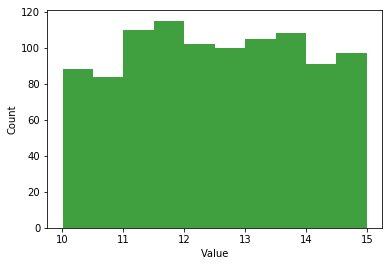

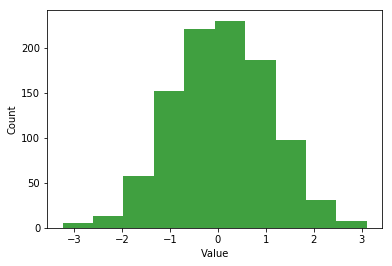

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

def rand_plot(samples):
    n, bins, patches = plt.hist(samples, 10, normed=0, facecolor='green', alpha=0.75)
    plt.xlabel("Value")
    plt.ylabel("Count")
    plt.show()
    
#uniform random number

unif = [random.uniform(10, 15) for _ in range(1000)]
rand_plot(unif)

#gaussian random number

gaussian = [random.gauss(mu, sigma) for _ in range(1000)]
rand_plot(gaussian)

We can also do random things with lists.

In [67]:
#randomly pick one item

birds = ["duck", "goose", "eagle", "swan"]

print(random.choice(birds))

#coin toss
coin = ["heads", "tails"]
print(random.choice(coin))

#shuffle the items of a list in place
random.shuffle(birds)
print(birds)


swan
heads
['duck', 'swan', 'goose', 'eagle']


# Data structures

The `collections` module lets us enhance some of the container types we've seen for more user friendliness.

In [74]:
import collections

#count number of occurences from a list
c = collections.Counter(["red", "red", "red", "black", "red", "blue", "blue"])
print(c)
print(c['red'])
#get the 2 most common elements
print(c.most_common(2))

Counter({'red': 4, 'blue': 2, 'black': 1})
4
[('red', 4), ('blue', 2)]


`namedtuple` lets us give names to the indices of a tuple.

In [77]:
Student = collections.namedtuple('Student', ['name', 'grade', 'major'])

s = Student('Carlos', 2.1, 'cs')
print(s.grade)
print(s.name)
print(s.major)

2.1
Carlos
cs


Useful for giving CSV entries meaningful names.

`test.csv`:

```
carlos,2.4,cs
jim,3.1,math
joan,2.5,phys
jack,3.6,cs
```

In [82]:
with open("test.csv", "r") as students:
    for s in students:
        #the _make() function lets you make a NamedTuple from an iterable
        tup = Student._make(s.strip().split(","))
        print(tup)
        print(tup.name)

Student(name='carlos', grade='2.4', major='cs')
carlos
Student(name='jim', grade='3.1', major='math')
jim
Student(name='joan', grade='2.5', major='phys')
joan
Student(name='jack', grade='3.6', major='cs')
jack


The `datetime` module is useful for handling date formats.

In [93]:
import datetime as dt

date = dt.date(2017, 11, 9)
print(date)
print(date.year)

#today's date
print(dt.date.today())

#compare dates
christmas = dt.date(2017, 12, 25)
till_christmas = christmas - dt.date.today()
#produces a timedelta object
print(type(till_christmas))

print(f"Days till Christmas: {till_christmas}")

#day of the week as an integer
print(dt.date.today().weekday())

2017-11-09
2017
2017-11-06
<class 'datetime.timedelta'>
Days till Christmas: 49 days, 0:00:00
0


# Quality Control

The `timeit` module helps you time the execution of some code snippets.

In [96]:
import timeit

timeit.timeit("[x*x for x in range(100)]")

7.107274963003874

The `doctest` module lets you put executable python in docstrings as test calls to make sure everything works as expected. The module looks for `>>>` interactive python calls and compares the actual call to what is in the string as the output. 

In [105]:
import doctest

def mysquare(x):
    """
        This function computes the square of a number.
        >>> myfoo(5)
        25
    """
    return x*x
def mymean(nums):
    """
        This function computes the mean of a list of numbers.
        >>> mymean([2, 2, 3, 4])
        2.75
    """
    tot = 0
    for i in nums:
        tot += i + 2
    return tot / len(nums)

doctest.testmod()

**********************************************************************
File "__main__", line 13, in __main__.mymean
Failed example:
    mymean([2, 2, 3, 4])
Expected:
    2.75
Got:
    4.75
**********************************************************************
1 items had failures:
   1 of   1 in __main__.mymean
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=3)

# Data Storage

`pickle` is a very useful module for storing python objects in files so that you can keep working on them later.


In [106]:
import pickle

rand_dict = {}

animals = ["dog", "cat", "giraffe", "lion", "zebra"]

for a in animals:
    rand_dict[a] = random.random()


I can now store, or **dump** the dictionary to a file.

Pickle stores objects as a binary representation which is not human readable and only works in Python but is very fast.

In [109]:
pickle.dump(rand_dict, open("rand_dict.pickle", "wb"))

In [110]:
loaded = pickle.load(open("rand_dict.pickle", "rb"))

In [111]:
print(loaded)

{'dog': 0.9358434592096994, 'cat': 0.9564872525963942, 'giraffe': 0.7882036439361392, 'lion': 0.19402074670182368, 'zebra': 0.8678583330023182}


`json` does a similar job but the contents are human-readable and can be read by any language. The downside is it's not as fast.

JSON cannot store any custom classes and not all python classes can be JSONed.

In [112]:
import json

json.dump(rand_dict, open("rand_dict.json", "w"))

In [113]:
jsoned = json.load(open("rand_dict.json", "r"))

In [114]:
jsoned

{'cat': 0.9564872525963942,
 'dog': 0.9358434592096994,
 'giraffe': 0.7882036439361392,
 'lion': 0.19402074670182368,
 'zebra': 0.8678583330023182}

# Multiprocessing

Sometimes you can have tasks that can be easily parallelized.

Since most computers have more than one processor, we can let multiple processors work on our Python at the same time.

For example:

For a given number $n$ I want to compute the sum of every number **up to $n$** cubed. 

Obviously the process of squaring a particular number in the list is independent of squaring any other number.

In [125]:
from multiprocessing import Pool
import time

def cube_sum(x):
    return sum([i**3 for i in range(x)])

#we use the context manager to take care of all the setup
#we create a Pool object which contains the processors we can send tasks to
#here we have chosen to use 4 processes

start = time.time()
nums = [i for i in range(10000)]

with Pool(4) as p:
    result = p.map(cube_sum, nums)
print(f"Parallel job took: {time.time() - start}")

### normally:
start_serial = time.time()
serial_result = [cube_sum(x) for x in nums]
print(f"Serial job took {time.time() - start_serial}")

Parallel job took: 10.1304292678833
Serial job took 19.55746626853943


The reason I came up with such a weird function is that parallelizing is not always faster.

There is quite a bit of setup and communication that needs to happen to coordinate the processors (aka **overhead**).

If the actual comptuation is faster than the overhead then the normal serial method is faster.

# Others

There are many other modules that I did not cover, and many other functionalities of the ones I did cover that I didn't have time to show you.

Some notable Standard Library modules worth looking into:

* `re`: searching for patterns inside strings
* `statistics`: basics statistics function (mean, std, etc)
* `os.path`, `glob`: handling file paths 
* `csv`: automatic CSV file parsing
* `logging`: code and error logging
* `argpars`: command line argument parser
* `tkinter`: building graphical user interfaces